# GNOD 2

In [16]:
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import requests

In [17]:
url = 'https://www.popvortex.com/music/charts/top-100-songs.php'

In [18]:
response = requests.get(url)
response.status_code 

200

getting the soup and prettifing that soup.

In [269]:
soup = BeautifulSoup(response.content, "html.parser")
# print(soup.prettify())

## Selector :

body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper

In [20]:
# soup.select('body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper')

In [21]:
# soup.select('div.chart-wrapper')

In [270]:
charts = soup.select('div.chart-wrapper p')
# charts

looking for artists and their songs

In [23]:
soup.select("div.chart-wrapper p em")
# soup.select("div.chart-wrapper p cite")


[<em class="artist">Taylor Swift</em>,
 <em class="artist">Sam Smith &amp; Kim Petras</em>,
 <em class="artist">Rihanna</em>,
 <em class="artist">Nick Carter</em>,
 <em class="artist">Lainey Wilson</em>,
 <em class="artist">Meghan Trainor</em>,
 <em class="artist">Jelly Roll</em>,
 <em class="artist">HARDY &amp; Lainey Wilson</em>,
 <em class="artist">Sean Paul</em>,
 <em class="artist">Morgan Wallen</em>,
 <em class="artist">Daughtry</em>,
 <em class="artist">Bizarrap &amp; Shakira</em>,
 <em class="artist">OneRepublic</em>,
 <em class="artist">Lady Gaga</em>,
 <em class="artist">David Guetta &amp; Bebe Rexha</em>,
 <em class="artist">Sia</em>,
 <em class="artist">Kane Brown &amp; Katelyn Brown</em>,
 <em class="artist">Zach Bryan</em>,
 <em class="artist">Jeff Beck &amp; Rod Stewart</em>,
 <em class="artist">Bailey Zimmerman</em>,
 <em class="artist">Harry Styles</em>,
 <em class="artist">Alaura Lynne</em>,
 <em class="artist">Lady Gaga</em>,
 <em class="artist">Morgan Wallen</em>,
 

creating lists

In [24]:
chart_position = []
song_title = []
artist = []


num_iter = len(soup.select('div.chart-wrapper p em'))
# num_iter = len(soup.select('p.title-artits'))

tClist = soup.select('div.chart-wrapper p cite')
tClist1 = soup.select('div.chart-wrapper p em')


for i in range(num_iter):
    song_title.append(tClist[i].get_text())
    artist.append(tClist1[i].get_text())
    # chart_position.append(tClist[i]['title-artist'])
    chart_position.append(i+1)

print(song_title)
print(artist)
print(chart_position)

['Anti-Hero', 'Unholy', 'Lift Me Up (From Black Panther: Wakanda Forever - Music From and Inspired By)', 'Hurts to Love You', 'Heart Like A Truck', 'Made You Look', 'Son Of A Sinner', 'wait in the truck', 'Temperature', 'Thought You Should Know', 'Separate Ways (Worlds Apart) [feat. Lzzy Hale]', 'Shakira: Bzrp Music Sessions, Vol. 53', "I Ain't Worried", 'Bloody Mary', "I'm Good (Blue)", 'Unstoppable', 'Thank God', "Something in the Orange (Z&E's Version)", 'People Get Ready', 'Rock and a Hard Place', 'As It Was', "I Ain't a Bitch", 'Hold My Hand', 'You Proof', 'Calm Down', 'Players', 'The Oath', 'New Punani', 'Forever', 'RZA', 'Igloo', 'Free Smoke (feat. BIG30)', 'Choose You', 'Addicted to You', 'Intro (feat. Cheeze)', "Can't Stop Won't Stop (Remix) [feat. Kodak Black]", 'Not So Bad', 'Trench', 'Chit Chat (feat. DJ Drama)', 'Project Baby (Remix)', 'One Thing At A Time', 'Mine', 'Going, Going, Gone', 'Cooler Than Me (Single Mix)', 'golden hour', "Creepin'", 'Wasted On You', 'Hold Me Cl

dataframe of top 100 songs /w artists

In [25]:
top_100 = pd.DataFrame({'ranking':chart_position,
                    "title":song_title,
                       "artist":artist                    
                      })
top_100

,ranking,title,artist
0,1,Anti-Hero,Taylor Swift
1,2,Unholy,Sam Smith & Kim Petras
2,3,Lift Me Up (From Black Panther: Wakanda Foreve...,Rihanna
3,4,Hurts to Love You,Nick Carter
4,5,Heart Like A Truck,Lainey Wilson
...,...,...,...
95,96,I'll Be Waiting,Cian Ducrot
96,97,Cry to Me (Single Version),Solomon Burke
97,98,Bad Habit,Steve Lacy
98,99,Fenty,French Montana & NAV


# 1st prototype GNOD 2

inputs of songs title and artist name

In [26]:
user_song_title = input('Select a song:')
print(user_song_title)

She Had Me At Heads Carolina


In [27]:
user_song_artist = input('Select an Artist:')
print(user_song_artist)

Cole Swindell


checking for match in our Top 100 list 

In [28]:
user_selection = top_100[(top_100.title == user_song_title) & (top_100.artist == user_song_artist)].index
user_selection

Int64Index([70], dtype='int64')

In [29]:
import random

If statement for a recommender

In [30]:
if user_selection.size == 0:
    print('Song not found, please try again for recommendations.') 
else:
    recommendation = random.randint(0, len(top_100))
while recommendation == user_selection:
    recommendation = random.randint(0, len(top_100))
display(top_100[top_100.index == recommendation])

,ranking,title,artist
66,67,No Horse To Ride,Luke Grimes


# getting the 10k playlist

In [31]:
from random import randint
from time import sleep
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [32]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]] = line.split(':')[1].strip()

Identify to spotify

In [33]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

getting the playlist of 10 K

In [34]:
playlist = sp.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")
playlist["total"] 

10000

Function to extract all songs from a playlist

In [35]:
def get_playlist_tracks(playlist_id):
    playlist = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = playlist['items']
    while playlist['next']!=None:          # while there is still a next ply to go to
        playlist = sp.next(playlist)
        tracks = tracks + playlist['items']
        sleep(randint(1,2))
    return tracks

In [36]:
all_tracks = get_playlist_tracks("6yPiKpy7evrwvZodByKvM9")
len(all_tracks)

10000

In [45]:
all_tracks[130]['track']['uri']

'spotify:track:6o9Dt1j9ywLoX8B9dqRM5D'

list of all the artists in the playlist

In [37]:
artists = []
for i in range(len(all_tracks)):
    artists.append(all_tracks[i]['track']['artists'][0]['name'])
len(artists)

10000

list of all the songs in the playlist

In [46]:
song_title = []
for i in range(len(all_tracks)):
    song_title.append(all_tracks[i]['track']['name'])
len(song_title)

10000

list of all the uri's of all the songs in the playlist

In [47]:
song_uri = []
for i in range(len(all_tracks)):
    song_uri.append(all_tracks[i]['track']['uri'])
len(song_uri)

10000

trying the same with a function

In [273]:
def get_tracks(all_tracks):
    # track_list = []
    artists1 = []
    song_title1 = []
    song_uri1 = []
    # my_features1 = []
    # my_data1 = pd.DataFrame({'artists': artists1, 'titles': song_title1, 'uri': song_uri1})
    # my_data_uri1 = pd.DataFrame({'artists': artists1, 'titles': song_title1, 'features': my_features1})

    for i in range(len(all_tracks)):
        artists1.append(all_tracks[i]['track']['artists'][0]['name'])
        song_title1.append(all_tracks[i]['track']['name'])
        song_uri1.append(all_tracks[i]['track']['uri'])
        # my_features1.append(my_data1['uri'][i].split(':')[-1])

        # track_list.append([
        #     all_tracks[i]['items']['track']['uri'],
        #     all_tracks[i]['items']['track']['name'],
        #     all_tracks[i]['items']['track']['album']['name'],
        #     all_tracks[i]['items']['track']['album']['id'],                  
        
        return artists1, song_title1, song_uri1

In [274]:
get_tracks(all_tracks)

(['Nosaj Thing'], ['2K'], ['spotify:track:33xMbeHzmWd6Od0BmLZEUs'])

the dataframe

In [48]:
my_data = pd.DataFrame({'artists': artists, 'titles': song_title, 'uri': song_uri})
my_data

,artists,titles,uri
0,Nosaj Thing,2K,spotify:track:33xMbeHzmWd6Od0BmLZEUs
1,The Doors,4 Billion Souls,spotify:track:3UnyplmZaq547hwsfOR5yy
2,Radiohead,4 Minute Warning,spotify:track:1w8QCSDH4QobcQeT4uMKLm
3,Vitas,7 Element,spotify:track:7J9mBHG4J2eIfDAv5BehKA
4,R.E.M.,#9 Dream,spotify:track:1VZedwJj1gyi88WFRhfThb
...,...,...,...
9995,The Clash,London Calling - Remastered,spotify:track:5jzma6gCzYtKB1DbEwFZKH
9996,War,Low Rider,spotify:track:2fmMPJb5EzZCx8BcNJvVk4
9997,Moby,Flower,spotify:track:60rIdEPDrzyLiLC0icp3xz
9998,The Cat Empire,Brighter Than Gold,spotify:track:0sEm1ld0V8YTCPcjPVfIsc


cleaning uri

In [49]:
my_features = []
for i in range(len(my_data['uri'])):
    my_features.append(my_data['uri'][i].split(':')[-1])
len(my_features)

10000

dataframe with uri of the actual song

In [53]:
my_data_uri = pd.DataFrame({'artists': artists, 'titles': song_title, 'features': my_features})
my_data_uri

,artists,titles,features
0,Nosaj Thing,2K,33xMbeHzmWd6Od0BmLZEUs
1,The Doors,4 Billion Souls,3UnyplmZaq547hwsfOR5yy
2,Radiohead,4 Minute Warning,1w8QCSDH4QobcQeT4uMKLm
3,Vitas,7 Element,7J9mBHG4J2eIfDAv5BehKA
4,R.E.M.,#9 Dream,1VZedwJj1gyi88WFRhfThb
...,...,...,...
9995,The Clash,London Calling - Remastered,5jzma6gCzYtKB1DbEwFZKH
9996,War,Low Rider,2fmMPJb5EzZCx8BcNJvVk4
9997,Moby,Flower,60rIdEPDrzyLiLC0icp3xz
9998,The Cat Empire,Brighter Than Gold,0sEm1ld0V8YTCPcjPVfIsc


looping all uri pages to get the audio features

In [117]:
sp.audio_features(my_data_uri['features'][37])
# we check first the path to a feature

[{'danceability': 0.252,
  'energy': 0.395,
  'key': 1,
  'loudness': -12.323,
  'mode': 1,
  'speechiness': 0.0283,
  'acousticness': 0.405,
  'instrumentalness': 0.000119,
  'liveness': 0.0635,
  'valence': 0.84,
  'tempo': 154.06,
  'type': 'audio_features',
  'id': '2Yh0H2OXI2UItG9GGfQzlK',
  'uri': 'spotify:track:2Yh0H2OXI2UItG9GGfQzlK',
  'track_href': 'https://api.spotify.com/v1/tracks/2Yh0H2OXI2UItG9GGfQzlK',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Yh0H2OXI2UItG9GGfQzlK',
  'duration_ms': 229787,
  'time_signature': 4}]

In [79]:
import time

We loop through the features of all the uri in the data

In [87]:
uris_feat = []

for i in range(len(my_data_uri['features'])):
    uris_feat.append(sp.audio_features(my_data_uri['features'][i]))
uris_feat

# uris_feat = []
# stop_list = list(range(1,10000,100))

# for i in range(len(my_data_uri['uri'])):
#     if i in stop_list:
#         wait_time = random.randint(1,4)
#         print('Napping for ',wait_time,'s')
#         print(i)
#         sleep(wait_time)      
#     uris_feat.append(sp.audio_features(my_data_uri['uri'][i]))

# uris_feat

[[{'danceability': 0.31,
   'energy': 0.445,
   'key': 7,
   'loudness': -13.355,
   'mode': 0,
   'speechiness': 0.0863,
   'acousticness': 0.094,
   'instrumentalness': 0.0678,
   'liveness': 0.113,
   'valence': 0.122,
   'tempo': 95.36,
   'type': 'audio_features',
   'id': '33xMbeHzmWd6Od0BmLZEUs',
   'uri': 'spotify:track:33xMbeHzmWd6Od0BmLZEUs',
   'track_href': 'https://api.spotify.com/v1/tracks/33xMbeHzmWd6Od0BmLZEUs',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/33xMbeHzmWd6Od0BmLZEUs',
   'duration_ms': 152560,
   'time_signature': 3}],
 [{'danceability': 0.419,
   'energy': 0.565,
   'key': 5,
   'loudness': -11.565,
   'mode': 1,
   'speechiness': 0.0347,
   'acousticness': 0.137,
   'instrumentalness': 0.337,
   'liveness': 0.128,
   'valence': 0.648,
   'tempo': 151.277,
   'type': 'audio_features',
   'id': '3UnyplmZaq547hwsfOR5yy',
   'uri': 'spotify:track:3UnyplmZaq547hwsfOR5yy',
   'track_href': 'https://api.spotify.com/v1/tracks/3UnyplmZaq547hwsfOR5

we transform into a dataframe

In [89]:
my_data_clean = pd.DataFrame({'artists': artists, 'titles': song_title, 'audio_features': uris_feat})
# my_data_clean

,artists,titles,audio_features
0,Nosaj Thing,2K,"[{'danceability': 0.31, 'energy': 0.445, 'key'..."
1,The Doors,4 Billion Souls,"[{'danceability': 0.419, 'energy': 0.565, 'key..."
2,Radiohead,4 Minute Warning,"[{'danceability': 0.354, 'energy': 0.302, 'key..."
3,Vitas,7 Element,"[{'danceability': 0.727, 'energy': 0.785, 'key..."
4,R.E.M.,#9 Dream,"[{'danceability': 0.571, 'energy': 0.724, 'key..."
...,...,...,...
9995,The Clash,London Calling - Remastered,"[{'danceability': 0.651, 'energy': 0.801, 'key..."
9996,War,Low Rider,"[{'danceability': 0.811, 'energy': 0.647, 'key..."
9997,Moby,Flower,"[{'danceability': 0.686, 'energy': 0.61, 'key'..."
9998,The Cat Empire,Brighter Than Gold,"[{'danceability': 0.711, 'energy': 0.718, 'key..."


we save our data to csv "just incase " 

In [90]:
my_data_clean.to_csv('my_data_clean.csv', index = False)

In [94]:
# my_data_clean['audio_features'][0]

[{'danceability': 0.31,
  'energy': 0.445,
  'key': 7,
  'loudness': -13.355,
  'mode': 0,
  'speechiness': 0.0863,
  'acousticness': 0.094,
  'instrumentalness': 0.0678,
  'liveness': 0.113,
  'valence': 0.122,
  'tempo': 95.36,
  'type': 'audio_features',
  'id': '33xMbeHzmWd6Od0BmLZEUs',
  'uri': 'spotify:track:33xMbeHzmWd6Od0BmLZEUs',
  'track_href': 'https://api.spotify.com/v1/tracks/33xMbeHzmWd6Od0BmLZEUs',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/33xMbeHzmWd6Od0BmLZEUs',
  'duration_ms': 152560,
  'time_signature': 3}]

we flattend the features 

In [92]:
from pandas import json_normalize


In [102]:
my_data_flat = json_normalize(my_data_clean['audio_features'])
my_data_flat.columns = ['all_feats']
# my_data_flat

,all_feats
0,"{'danceability': 0.31, 'energy': 0.445, 'key':..."
1,"{'danceability': 0.419, 'energy': 0.565, 'key'..."
2,"{'danceability': 0.354, 'energy': 0.302, 'key'..."
3,"{'danceability': 0.727, 'energy': 0.785, 'key'..."
4,"{'danceability': 0.571, 'energy': 0.724, 'key'..."
...,...
9995,"{'danceability': 0.651, 'energy': 0.801, 'key'..."
9996,"{'danceability': 0.811, 'energy': 0.647, 'key'..."
9997,"{'danceability': 0.686, 'energy': 0.61, 'key':..."
9998,"{'danceability': 0.711, 'energy': 0.718, 'key'..."


we flattened and drop some unusefull features

In [106]:
flattened_data = json_normalize(my_data_flat['all_feats'])
flat_data_clean = flattened_data.drop(['mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature'], axis = 1)
# flat_data_clean

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.310,0.445,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0
1,0.419,0.565,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0
2,0.354,0.302,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0
3,0.727,0.785,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0
4,0.571,0.724,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.651,0.801,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0
9996,0.811,0.647,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0
9997,0.686,0.610,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0
9998,0.711,0.718,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0


In [113]:
data_almsot_clean = pd.concat([my_data_clean, flat_data_clean], axis = 1)
data_almsot_clean

,artists,titles,audio_features,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Nosaj Thing,2K,"[{'danceability': 0.31, 'energy': 0.445, 'key'...",0.310,0.445,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0
1,The Doors,4 Billion Souls,"[{'danceability': 0.419, 'energy': 0.565, 'key...",0.419,0.565,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0
2,Radiohead,4 Minute Warning,"[{'danceability': 0.354, 'energy': 0.302, 'key...",0.354,0.302,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0
3,Vitas,7 Element,"[{'danceability': 0.727, 'energy': 0.785, 'key...",0.727,0.785,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0
4,R.E.M.,#9 Dream,"[{'danceability': 0.571, 'energy': 0.724, 'key...",0.571,0.724,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Clash,London Calling - Remastered,"[{'danceability': 0.651, 'energy': 0.801, 'key...",0.651,0.801,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0
9996,War,Low Rider,"[{'danceability': 0.811, 'energy': 0.647, 'key...",0.811,0.647,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0
9997,Moby,Flower,"[{'danceability': 0.686, 'energy': 0.61, 'key'...",0.686,0.610,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0
9998,The Cat Empire,Brighter Than Gold,"[{'danceability': 0.711, 'energy': 0.718, 'key...",0.711,0.718,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0


Clean and save data

In [116]:
data_clean = data_almsot_clean.drop(['audio_features'], axis = 1)
display(data_clean)
# data_clean.to_csv('data_clean.csv', index = False)

,artists,titles,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Nosaj Thing,2K,0.310,0.445,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0
1,The Doors,4 Billion Souls,0.419,0.565,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0
2,Radiohead,4 Minute Warning,0.354,0.302,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0
3,Vitas,7 Element,0.727,0.785,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0
4,R.E.M.,#9 Dream,0.571,0.724,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Clash,London Calling - Remastered,0.651,0.801,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0
9996,War,Low Rider,0.811,0.647,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0
9997,Moby,Flower,0.686,0.610,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0
9998,The Cat Empire,Brighter Than Gold,0.711,0.718,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0


# CLustering using K-means 

In [119]:
data = pd.read_csv('data_clean.csv')
data

,artists,titles,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Nosaj Thing,2K,0.310,0.445,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0
1,The Doors,4 Billion Souls,0.419,0.565,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0
2,Radiohead,4 Minute Warning,0.354,0.302,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0
3,Vitas,7 Element,0.727,0.785,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0
4,R.E.M.,#9 Dream,0.571,0.724,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Clash,London Calling - Remastered,0.651,0.801,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0
9996,War,Low Rider,0.811,0.647,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0
9997,Moby,Flower,0.686,0.610,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0
9998,The Cat Empire,Brighter Than Gold,0.711,0.718,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0


defining our set 

In [124]:
raw_X = data.drop(['artists', 'titles'], axis =1)
# raw_X

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.310,0.445,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0
1,0.419,0.565,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0
2,0.354,0.302,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0
3,0.727,0.785,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0
4,0.571,0.724,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.651,0.801,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0
9996,0.811,0.647,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0
9997,0.686,0.610,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0
9998,0.711,0.718,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0


checking for missing values

In [125]:
raw_X.isna().sum()

danceability        82
energy              82
key                 82
loudness            82
speechiness         82
acousticness        82
instrumentalness    82
liveness            82
valence             82
tempo               82
duration_ms         82
dtype: int64

dropping missing values for our train set (82 out of 10K is negligeable)

In [128]:
X = raw_X.dropna()
X.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,9918.0,0.567745,0.158788,0.0,0.4620,0.575000,0.680000,0.980
energy,9918.0,0.618056,0.234337,0.0,0.4590,0.654000,0.811000,0.998
key,9918.0,5.200141,3.592477,0.0,2.0000,5.000000,8.000000,11.000
loudness,9918.0,-8.169800,4.299080,-60.0,-9.9270,-7.258500,-5.309000,-0.475
speechiness,9918.0,0.072924,0.082400,0.0,0.0335,0.043450,0.070700,0.963
acousticness,9918.0,0.291582,0.316008,0.0,0.0233,0.148000,0.525000,0.996
instrumentalness,9918.0,0.118390,0.261564,0.0,0.0000,0.000116,0.030075,0.996
liveness,9918.0,0.191876,0.163641,0.0,0.0966,0.124000,0.237000,0.997
valence,9918.0,0.485370,0.247855,0.0,0.2870,0.477000,0.682000,0.991
tempo,9918.0,120.397229,28.706183,0.0,99.0895,119.977000,137.979750,239.964


cheching for type before processing

In [131]:
X.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
dtype: object

## Preprocessing

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## K-means

In [164]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# dataframe
pd.DataFrame(X_prep, columns = X.columns).head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.623287,-0.738529,0.501033,-1.206179,0.162338,-0.625276,-0.193424,-0.482032,-1.466130,-0.872233,-0.924079
1,-0.936802,-0.226420,-0.055714,-0.789790,-0.463909,-0.489196,0.835823,-0.390363,0.656181,1.075773,-0.400214
2,-1.346174,-1.348792,1.057780,-1.141744,-0.489396,0.944383,-0.181572,-0.494254,-1.058614,0.116907,0.140255
3,1.002990,0.712446,-0.055714,0.340276,-0.153213,0.105755,0.029095,0.721886,1.915043,0.322308,0.205873
4,0.020498,0.452124,-1.447582,0.512414,-0.569497,-0.849648,-0.440757,-0.610979,-0.404975,-0.126886,0.535181


### choosing a k

Elbow method

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

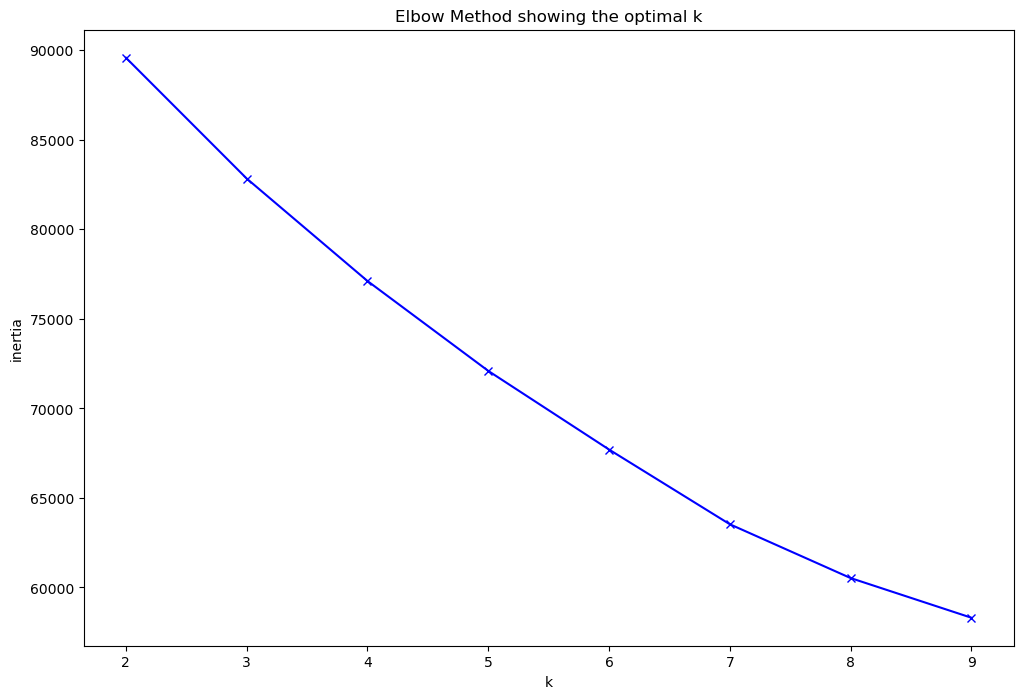

In [215]:
from sklearn.cluster import KMeans
K = range(2, 10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters = k,
                    random_state = 88)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Silhouette method

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

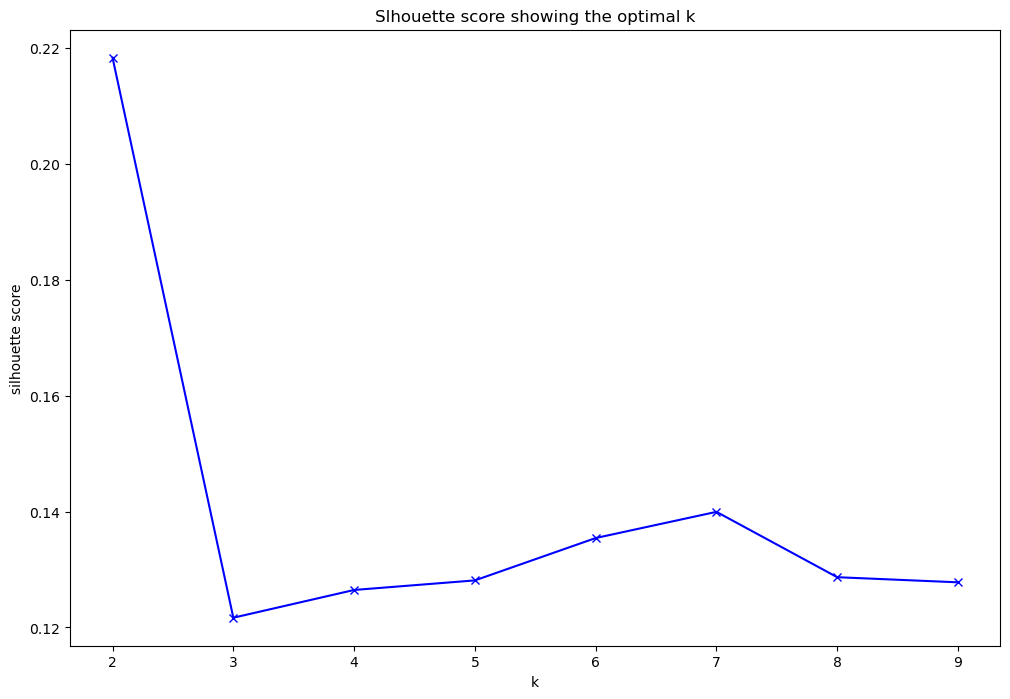

In [243]:
from sklearn.metrics import silhouette_score
K = range(2, 10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters = k,
                    random_state = 88)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(12,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

According to the 2 methods i decided to select k = 7 as a number of cluster for my database

we can see in the silhouette method that the highest number of k is 2, but having only 2 clusters for ourr database is not pertinent. therefore we are going to select the second highest value for k witch is k = 7.

## Agglomerative clustering

In [244]:
from sklearn import cluster

In [245]:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1796
1     778
2    1307
3    1962
4    1086
5     539
6    1514
7     519
8     417
dtype: int64

In [246]:
X_prep

array([[-1.62328701, -0.73852906,  0.50103302, ..., -1.46613049,
        -0.87223338, -0.92407864],
       [-0.9368022 , -0.22642029, -0.055714  , ...,  0.6561813 ,
         1.07577269, -0.40021414],
       [-1.34617387, -1.34879202,  1.05778003, ..., -1.05861435,
         0.11690653,  0.14025501],
       ...,
       [ 0.7447707 , -0.0343795 ,  0.50103302, ...,  1.13228927,
        -1.38758388, -0.30058624],
       [ 0.90222135,  0.4265184 ,  0.22265951, ...,  0.81757384,
        -0.11587735, -0.37020742],
       [-1.54141268,  1.6171713 , -1.16920802, ..., -0.68741152,
         2.77183428,  2.05168104]])

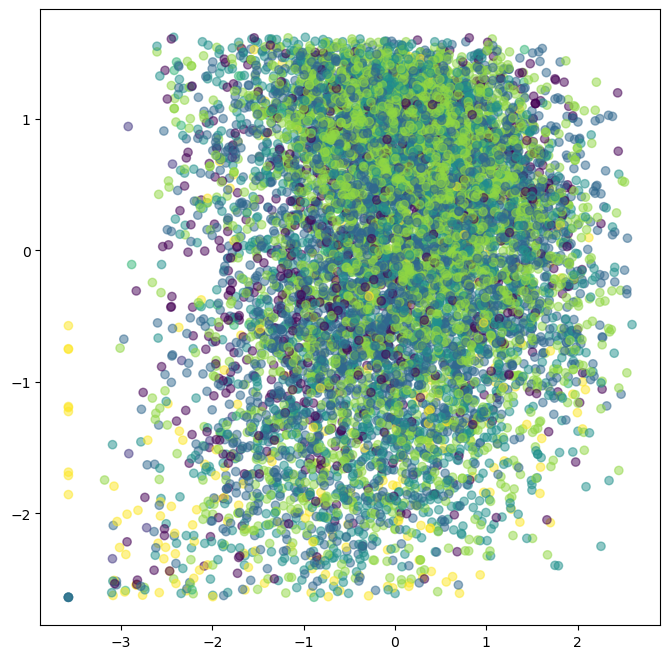

In [247]:
agglomerative = cluster.AgglomerativeClustering(n_clusters = 7,linkage='ward')
pred = agglomerative.fit_predict(X)

plt.figure(figsize = (8, 8))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c = pred, alpha=0.5)
plt.show()

assign clusters to the dataframe

In [264]:
data_X_clusters = X.assign(clusters = clusters)
data_X_clusters


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,0.310,0.445,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0,4
1,0.419,0.565,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0,2
2,0.354,0.302,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0,6
3,0.727,0.785,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0,3
4,0.571,0.724,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.651,0.801,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0,0
9996,0.811,0.647,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0,1
9997,0.686,0.610,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0,3
9998,0.711,0.718,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0,3


Adding the cluster to the original dataframe

In [265]:
data_clusters = pd.concat([data, data_X_clusters], axis = 1)
data_clusters

,artists,titles,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,Nosaj Thing,2K,0.310,0.445,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,...,7.0,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,152560.0,4.0
1,The Doors,4 Billion Souls,0.419,0.565,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,...,5.0,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,197707.0,2.0
2,Radiohead,4 Minute Warning,0.354,0.302,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,...,9.0,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,244285.0,6.0
3,Vitas,7 Element,0.727,0.785,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,...,5.0,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,249940.0,3.0
4,R.E.M.,#9 Dream,0.571,0.724,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,...,0.0,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,278320.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Clash,London Calling - Remastered,0.651,0.801,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,...,0.0,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,200480.0,0.0
9996,War,Low Rider,0.811,0.647,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,...,0.0,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,191560.0,1.0
9997,Moby,Flower,0.686,0.610,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,...,7.0,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,206293.0,3.0
9998,The Cat Empire,Brighter Than Gold,0.711,0.718,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,...,6.0,-5.739,0.0380,0.00824,0.002080,0.0732,0.688,117.071,200293.0,3.0


splitting 

In [249]:
X_train, X_test = train_test_split(
    X,
    test_size=0.2,
    random_state = 88
)

Scalling

In [266]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# display(X_train_scaled, X_test_scaled)

checking the describe

In [268]:
# display(X_train.describe().T, X_test.describe().T)

In [267]:
# display(pd.DataFrame(X_train_scaled).describe().T, pd.DataFrame(X_test_scaled).describe().T)

## PCA 

In [253]:
from sklearn.decomposition import PCA

In [254]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

explain the variance 

In [255]:
pca.explained_variance_ratio_ 

array([0.26029409, 0.12704717, 0.10014908, 0.09532011, 0.08923   ,
       0.0854909 , 0.08132471, 0.06657573, 0.0444763 , 0.03568739,
       0.01440452])

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

Eigenvalues = sum of square distances

In [257]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# eigenvalues
# for visualizing the variance explained by each principal component.

Visualisation of the Components

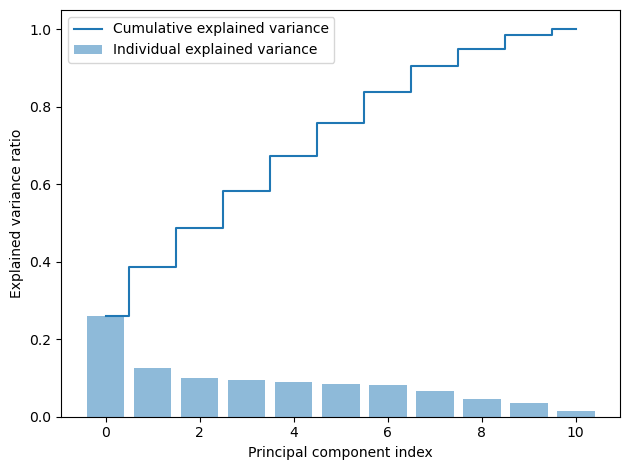

In [258]:
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, 
        alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Choosing the number of components

In [259]:
pca.explained_variance_ratio_[:3].sum() 

0.4874903339203598

In [260]:
pca.explained_variance_ratio_[:7].sum() 

0.838856049326115

In [262]:
pca_7 = PCA(7)
pca_7.fit(X_train_scaled)

PCA(n_components=7)

In [263]:

X_train_pca_7 = pca_7.transform(X_train_scaled)
X_test_pca_7 = pca_7.transform(X_test_scaled)